In [14]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time

In [15]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('df_v3_30_nearest_average.csv')
df.drop(['Unnamed: 0','lat','lon'], axis=1, inplace=True)
df

,District,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Availability 60,Reviews per Month,Calendar Updated (in days),Host since (in days),Number of Amenities,Number of host verifications,Global review score,Type of property,Type of Room,Real Bed,Cancellation_Policy,Superhost,Host profile pic,Host ID verified,Instant bookable,30 nearest
0,17,4,1.0,1.0,1.0,60.0,300.0,15.0,1,0,0,1.00,14,2083.0,14,5,10.00,3,3,1,3,0,1,1,1,0.257026
1,17,6,1.0,2.0,2.0,160.0,800.0,40.0,1,0,0,0.16,30,1500.0,18,6,9.67,3,3,1,1,0,1,1,1,0.332669
2,17,4,1.0,2.0,2.0,120.0,500.0,15.0,1,0,0,0.24,90,3050.0,9,4,10.00,3,3,1,1,0,1,0,0,0.224522
3,17,4,1.0,1.0,2.0,120.0,800.0,40.0,2,20,58,0.19,49,2660.0,17,5,9.00,3,3,1,3,0,1,1,0,0.373449
4,17,4,1.0,1.0,2.0,54.0,200.0,25.0,1,5,0,0.94,240,2729.0,19,5,9.00,3,3,1,2,0,1,1,0,0.343726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40039,8,5,2.0,3.0,5.0,160.0,500.0,30.0,2,25,19,1.68,4,2987.0,13,3,9.50,3,3,1,2,1,1,0,0,0.348375
40040,8,4,1.0,0.0,2.0,55.0,150.0,0.0,2,10,0,0.41,30,1626.0,5,2,9.83,3,3,1,3,0,1,0,0,0.275906
40041,8,2,1.0,1.0,1.0,50.0,0.0,0.0,1,20,59,0.41,4,1802.0,13,3,9.33,3,2,1,2,0,1,0,0,0.354959
40042,8,4,2.0,2.0,2.0,150.0,500.0,40.0,1,0,19,3.75,21,2596.0,9,4,10.00,3,3,1,2,1,1,0,0,0.268313


## Exploratory data analysis

       A compléter aprés

In [17]:
# Plotting the distribution of numerical and boolean categories
#df.hist(figsize=(20,20));

In [18]:
df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
df

,District,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security_Deposit,Cleaning_Fee,Guests_Included,Extra_People,Availability_60,Reviews_per_Month,Calendar_Updated_(in_days),Host_since_(in_days),Number_of_Amenities,Number_of_host_verifications,Global_review_score,Type_of_property,Type_of_Room,Real_Bed,Cancellation_Policy,Superhost,Host_profile_pic,Host_ID_verified,Instant_bookable,30_nearest
0,17,4,1.0,1.0,1.0,60.0,300.0,15.0,1,0,0,1.00,14,2083.0,14,5,10.00,3,3,1,3,0,1,1,1,0.257026
1,17,6,1.0,2.0,2.0,160.0,800.0,40.0,1,0,0,0.16,30,1500.0,18,6,9.67,3,3,1,1,0,1,1,1,0.332669
2,17,4,1.0,2.0,2.0,120.0,500.0,15.0,1,0,0,0.24,90,3050.0,9,4,10.00,3,3,1,1,0,1,0,0,0.224522
3,17,4,1.0,1.0,2.0,120.0,800.0,40.0,2,20,58,0.19,49,2660.0,17,5,9.00,3,3,1,3,0,1,1,0,0.373449
4,17,4,1.0,1.0,2.0,54.0,200.0,25.0,1,5,0,0.94,240,2729.0,19,5,9.00,3,3,1,2,0,1,1,0,0.343726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40039,8,5,2.0,3.0,5.0,160.0,500.0,30.0,2,25,19,1.68,4,2987.0,13,3,9.50,3,3,1,2,1,1,0,0,0.348375
40040,8,4,1.0,0.0,2.0,55.0,150.0,0.0,2,10,0,0.41,30,1626.0,5,2,9.83,3,3,1,3,0,1,0,0,0.275906
40041,8,2,1.0,1.0,1.0,50.0,0.0,0.0,1,20,59,0.41,4,1802.0,13,3,9.33,3,2,1,2,0,1,0,0,0.354959
40042,8,4,2.0,2.0,2.0,150.0,500.0,40.0,1,0,19,3.75,21,2596.0,9,4,10.00,3,3,1,2,1,1,0,0,0.268313


### Standardising and normalising

À l'exception de availability_90 et Host_since_(in_days), les autres variables numériques sont toutes biaisées de manière postérieure et pourraient bénéficier de la transformation **log**.

In [29]:
numerical_columns = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security_Deposit', 
         'Cleaning_Fee', 'Guests_Included', 'Extra_People', 'Availability_60', 'Reviews_per_Month', 
         'Calendar_Updated_(in_days)', 'Host_since_(in_days)', 'Number_of_Amenities', 
         'Number_of_host_verifications','Price','Global_review_score', '30_nearest']

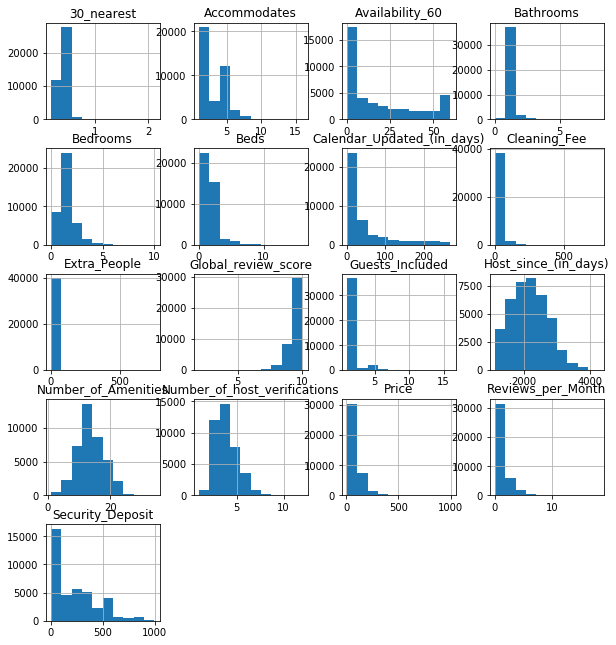

In [30]:
df[numerical_columns].hist(figsize=(10,11));

In [31]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['Availability_60','Host_since_(in_days)']] # Removing items not to be transformed

for col in numerical_columns:
    df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df[col] = np.log(df[col])

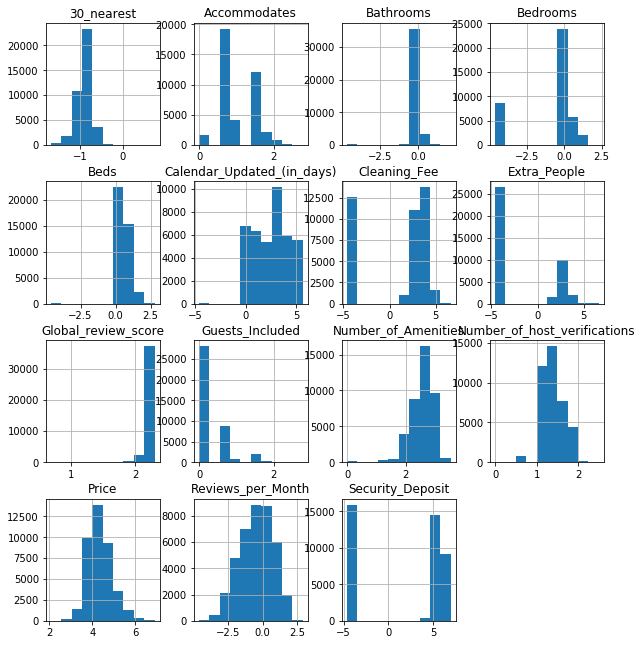

In [32]:
df[numerical_columns].hist(figsize=(10,11));

Cela semble avoir aidé certaines distributions, bien que certaines (par exemple, les frais de nettoyage, les frais de personnes supplémentaires et les frais de sécurité) contiennent un grand nombre de 0, ce qui signifie que ces fonctionnalités ne sont pas normalement distribuées. Mais le plus important , notre variable cible **Price** apparaît  beaucoup plus normalement distribué.

## Model 1 : XGBoost

**A vanilla XGBoost model** will be used to predict price, in order to provide a baseline level of accuracy and a measure of feature importance. 

The predictive features X and the target feature y can be separated, and X will be scaled( StandardScaler from sklearn)

In [33]:
# Separating X and y
X = df.drop('Price', axis=1)
y = df.Price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [48]:
# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains
data_dmatrix = xgb.DMatrix(data=X,label=y)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



The evaluation metrics used will be mean squared error (for loss) and r squared (for accuracy).

In [35]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [36]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[18:22:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.0814
Validation MSE: 0.0819

Training r2: 0.7373
Validation r2: 0.7305


## k-fold Cross Validation using XGBoost

In [37]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)

[18:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [38]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.511522,0.000917,3.511553,0.002425
1,3.165943,0.000922,3.166169,0.002210
2,2.855381,0.000854,2.855603,0.002540
3,2.576095,0.000397,2.576272,0.002737
4,2.325734,0.000605,2.325709,0.002883


In [39]:
#Extract and print the final boosting round metric.

In [40]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.303063
Name: test-rmse-mean, dtype: float64


In [41]:
cv_results['test-rmse-mean'].min()

0.3030633333333333

## Visualize Boosting Trees and Feature Importance

In [42]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[18:22:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


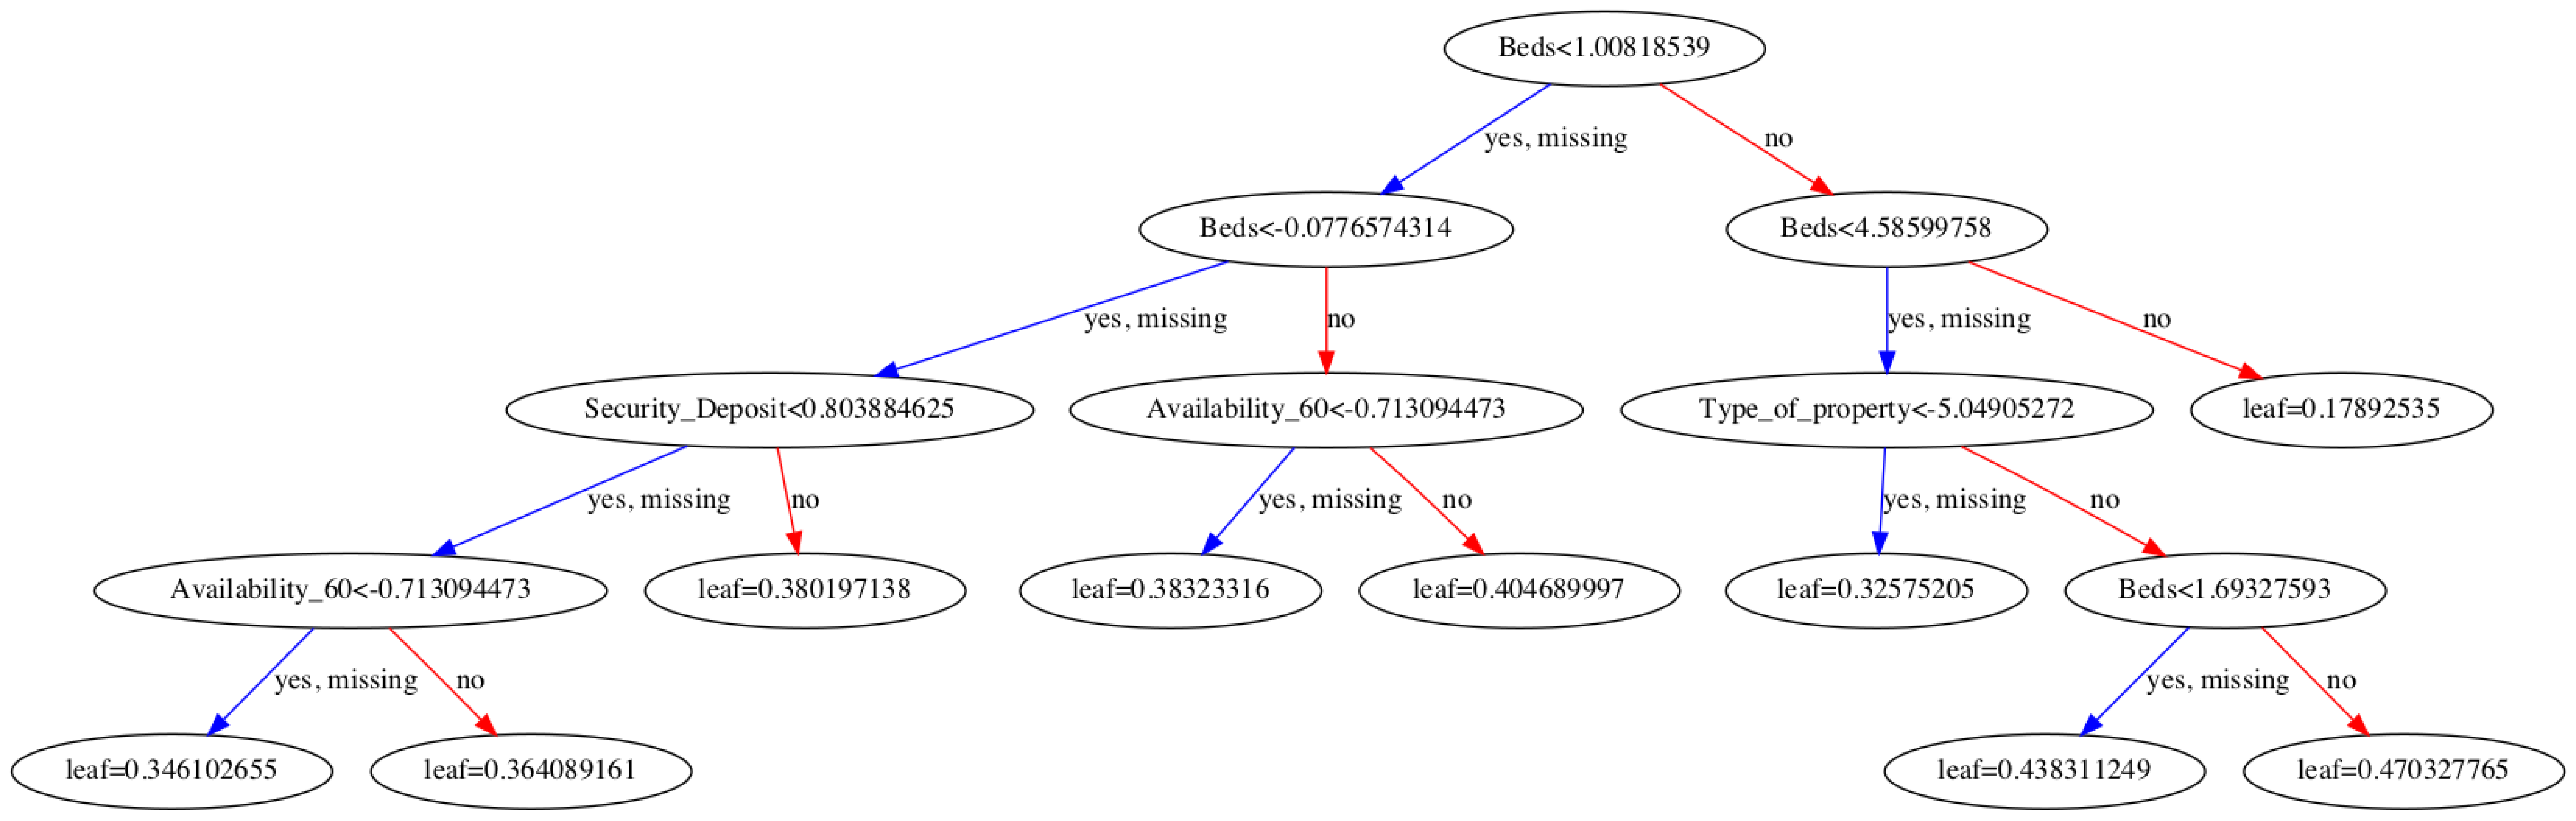

In [45]:
#Plotting the first tree
xgb.plot_tree(xg_reg,num_trees=0) 
#plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

In [46]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
Host_ID_verified,0.000000
Host_profile_pic,0.000000
Number_of_host_verifications,0.000000
30_nearest,0.001327
Instant_bookable,0.005274
Reviews_per_Month,0.005488
Host_since_(in_days),0.007727
Calendar_Updated_(in_days),0.008076
Type_of_property,0.009116
Superhost,0.009635


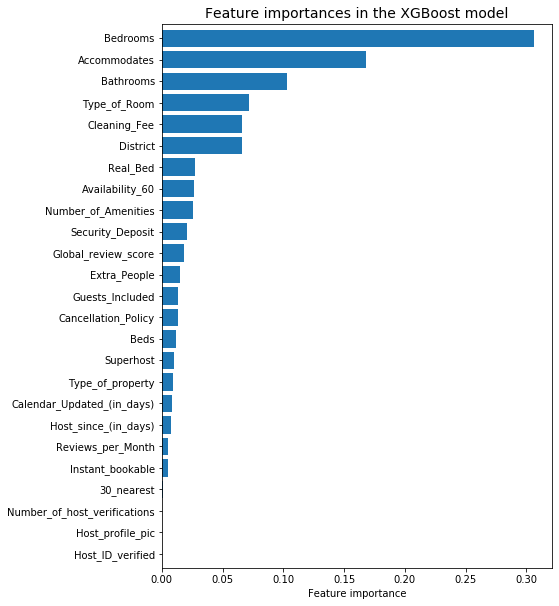

In [47]:
# Plotting feature importances
plt.figure(figsize=(7,10))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

**host ID verified** et **Host profile pic** et **Number_of_host_verificationsont** une features importance de 0 dans ce modèle de régression XGBoost et pourraient "potentiellement"être supprimées.

**The top 6 most important features are:**

- The number of badrooms
- How many people the property accommodates
- The number of bathrooms
- The Type of Room
- The cleaning fee
- District

===) Il n'est pas surprenant que parmis les caractéristique les plus importantes soit le nombre de personnes que la propriété accueille "accomodates", car c'est l'une des principales choses que vous utiliseriez pour rechercher des propriétés en premier lieu. Il n'est pas non plus surprenant que les variables liées à l'emplacement " District" et aux nombres de chambres"badrooms",cleaning fee, room type figurent dans le top 6.
